In [1]:
import os
import sys
import pandas as pd
import csv
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
from xgboost import XGBRegressor,plot_importance
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import Normalizer
import xgboost as xgb
from xgboost import plot_importance

In [3]:
from matplotlib import pyplot
%matplotlib inline

In [4]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
<a href="javascript:code_toggle_err()"><button>here</button></a>''')

### merging data to one data frame

In [5]:
year = pd.read_csv("../11_hour_merged_data.csv")

In [6]:
X = year.drop(columns=['GHI'])
Y = year.pop('GHI')

transformer = Normalizer().fit(X)
X_norm = transformer.transform(X)


seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

## data plots
plot for data analysis

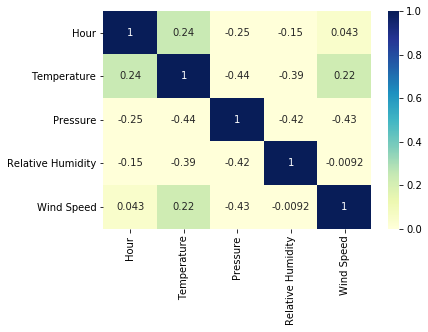

In [7]:
corr_hm = sns.heatmap(X.corr(), 
                xticklabels=X.corr().columns,
                yticklabels=X.corr().columns,vmin=0,vmax=1,cmap="YlGnBu",annot=True)
plt.show()

corr_hm.figure.savefig("../docs/corr_heatmap.png",dpi=200,bbox_inches = "tight")

### Box plots

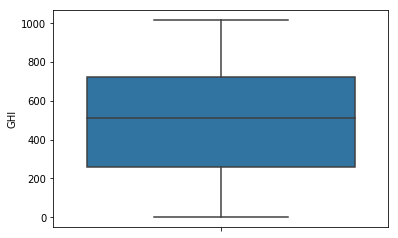

In [9]:
sns.boxplot(y=Y)
plt.show()

In [10]:
model = XGBRegressor(n_jobs=-1)
print(model)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)


In [12]:
learning_rate = [0.1, 0.2, 0.3,0.4,0.5,0.6]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_mean_squared_error", cv=kfold)
grid_result = grid_search.fit(X_train, y_train,verbose=True)

D:\projects\Solar_radiation_prediction\env\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
D:\projects\Solar_radiation_prediction\env\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\projects\Solar_radiation_prediction\env\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\projects\Solar_radiation_prediction\env\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\projects\Solar_radiation_prediction\env\lib\site-packages\

D:\projects\Solar_radiation_prediction\env\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\projects\Solar_radiation_prediction\env\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\projects\Solar_radiation_prediction\env\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\projects\Solar_radiation_prediction\env\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\projects\Solar_radiation_prediction\env\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed i

In [12]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -10565.484142 using {'learning_rate': 0.3}
-10804.830122 (967.875580) with: {'learning_rate': 0.1}
-10634.048103 (971.407354) with: {'learning_rate': 0.2}
-10565.484142 (1054.491287) with: {'learning_rate': 0.3}
-10799.403805 (904.944999) with: {'learning_rate': 0.4}
-10716.934651 (1060.490337) with: {'learning_rate': 0.5}
-11127.849946 (1028.238867) with: {'learning_rate': 0.6}


In [14]:
n_estimators = [5, 10, 20 , 50, 100, 150, 200]
max_depth = [2, 4, 6, 8, 10]
learning_rate = [0.3]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate)


kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_mean_squared_error", cv=kfold,verbose=1)
grid_result = grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 35 candidates, totalling 350 fits


/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(da

/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated a

/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated a

/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated a

/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated a

/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated a

/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated a

/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated a

/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated a

In [15]:
print("--------------------------------------------------------------------")
print("Best: %f using %s" % (math.sqrt(-grid_result.best_score_), grid_result.best_params_))
print("--------------------------------------------------------------------")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (math.sqrt(-mean), stdev, param))
scores = [math.sqrt(-x) for x in grid_result.cv_results_['mean_test_score']]
scores = np.array(scores).reshape(len(max_depth), len(n_estimators))
%matplotlib notebook
%matplotlib notebook
score = {}
for ind, i in enumerate(max_depth):
    score[i] = scores[ind]

--------------------------------------------------------------------
Best: 101.752347 using {'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 20}
--------------------------------------------------------------------
177.520046 (1897.810234) with: {'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 5}
124.215516 (1159.290323) with: {'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 10}
112.583043 (1052.867492) with: {'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 20}
107.356130 (987.127235) with: {'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 50}
104.893746 (914.567304) with: {'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 100}
103.952643 (954.886925) with: {'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 150}
103.781311 (943.372129) with: {'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 200}
147.905330 (1269.957198) with: {'learning_rate': 0.3, 'max_depth': 4, 'n_estimators': 5}
108.050641 (926.813572) with: {'learning_rate': 0.3, 'max_depth

Index(['Hour', 'Temperature', 'Pressure', 'Relative Humidity', 'Wind Speed'], dtype='object')
[0.60390353 0.33475065 0.02531186 0.02223945 0.01379442]


<IPython.core.display.Javascript object>


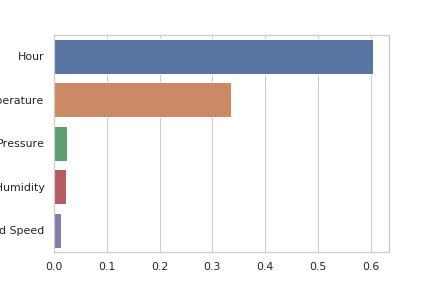

In [16]:
sns.set(style="whitegrid")
print(X.columns)
print(grid_result.best_estimator_.feature_importances_)


# sns_plot = sns.barplot(X.columns,grid_result.best_estimator_.feature_importances_)
# sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation=30)
# fig = sns_plot.get_figure()
# fig.savefig("../docs/feature_importance_vertical.png",dpi=200,bbox_inches = "tight")

sns_plot = sns.barplot(grid_result.best_estimator_.feature_importances_, X.columns)
fig = sns_plot.get_figure()
fig.savefig("../docs/feature_importance_horizontal.png",dpi=200,bbox_inches = "tight")

In [17]:
clf = XGBRegressor(max_depth=8, learning_rate=0.4, n_estimators=10)
scores = sklearn.model_selection.cross_val_score(clf, X, Y, 
                                              cv=kfold, scoring='neg_mean_squared_error')

/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/primus/durgeshapi/ensemble/env/lib/pyth

In [18]:
print("RSME: %0.2f (+/- %0.2f) " % (math.sqrt(-scores.mean()), scores.std()))

RSME: 102.69 (+/- 1042.40) 


/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


<IPython.core.display.Javascript object>


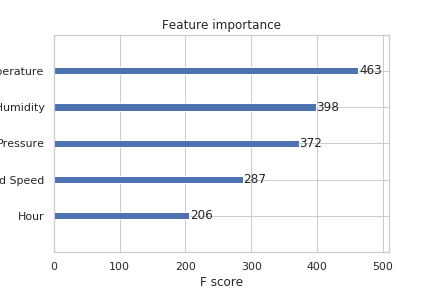

In [19]:
clf.fit(X,Y)
plot_importance(clf)
pyplot.show()

[0.71113294 0.24268584 0.01363754 0.0213933  0.01115041]


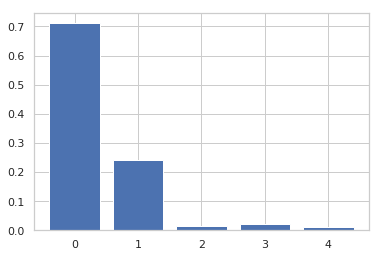

In [20]:
print(clf.feature_importances_)
%matplotlib inline
plt.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
plt.show()

In [21]:
## doesn't required for cross validation

predictinos = clf.predict(X_test)
squared_sum = 0
for counter,i in enumerate(y_test):
    squared_sum += ((i)-predictinos[counter])**2
print(math.sqrt(squared_sum/len(y_test)))   

84.26646085741343


In [22]:
import numpy as np
from bokeh.models import Label
from bokeh.layouts import gridplot
from bokeh.plotting import figure, save, output_file

p1 = figure()
p1.grid.grid_line_alpha=0.6
p1.xaxis.axis_label = 'n_estimators'
p1.yaxis.axis_label = 'RSME'

p1.line(n_estimators, score[2] , color='#A6CEE3', legend="max_depth:2")
p1.circle(n_estimators, score[2], color='#A6CEE3', legend="max_depth:2")
p1.line(n_estimators, score[4] , color='#000000', legend="max_depth:4")
p1.circle(n_estimators, score[4], color='#000000', legend="max_depth:4")
p1.line(n_estimators, score[6] , color='#FFFF00', legend="max_depth:6")
p1.circle(n_estimators, score[6], color='#FFFF00', legend="max_depth:6")
p1.line(n_estimators, score[8] , color='#00FF00', legend="max_depth:8")
p1.circle(n_estimators, score[8], color='#00FF00', legend="max_depth:8")
p1.line(n_estimators, score[10] , color='#000080', legend="max_depth:10")
p1.circle(n_estimators, score[10], color='#000080', legend="max_depth:10")

output_file("../docs/rmse_plot_for_xgboost_model.html", title="RSME Plots")

save(gridplot([[p1]], plot_width=900, plot_height=600))

'/home/primus/durgeshapi/ensemble/docs/rmse_plot_for_xgboost_model.html'